In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [9]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')



Saving modis_2021_India.csv to modis_2021_India.csv
Saving modis_2022_India.csv to modis_2022_India.csv
Saving modis_2023_India.csv to modis_2023_India.csv


In [10]:
df1.head()    # this will by deafult gives us 5 rows


# but suppose we have to give our desired number of rows then we can type that  much numbers inside the head :-

#df1.head(10)    # this will by deafult gives us 10 rows


# and for last 5 rows we can use :-

#df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [11]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [12]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [14]:
# So there are 3 different files we have , and performing task on this 3 one by one becomes challenge for our , so we can merge these 3 files in one to save our time

df=pd.concat([df1,df2,df3] , ignore_index=True)
df.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [17]:
# to know how many rows and columns are there , we can use the  shape function


df.shape

(271217, 15)

In [18]:
# and to know what are the different datatypes or memory allocation available in this we use info function


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [19]:
# checking missing values:-

df.isnull().sum()

,0
latitude,0
longitude,0
brightness,0
scan,0
track,0
acq_date,0
acq_time,0
satellite,0
instrument,0
confidence,0


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
# list out column names to check:-

df.columns

# and we see that all the column names are of object or string data type

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [22]:
# statistics of datasete :-
df.describe().T

# here is T is transpose as we have changed the rowss and columns in the output
# suppose if we don't do this it make hard for us to understand the output becoz columns are in more number and then we have to scroll right to much to see the columns
# df.describe()


# and in this i have only those which are in numbers

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [25]:
# checking uniuqe values of target variable:-

df.type.value_counts()


# 0----vegetation
# 1----active volcano
# 2----static
# 3----offshore


# and becoz we are taking indian subcontinent so that's why number 1 is not in the count output as we don't have any active volcano in our dataset except that in andaman

,count
type,
0,257625
2,13550
3,42


**Exploratory Data Analysis (EDA)**

In [27]:
# Checking  unique and n unique values for all categorical features:-

for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


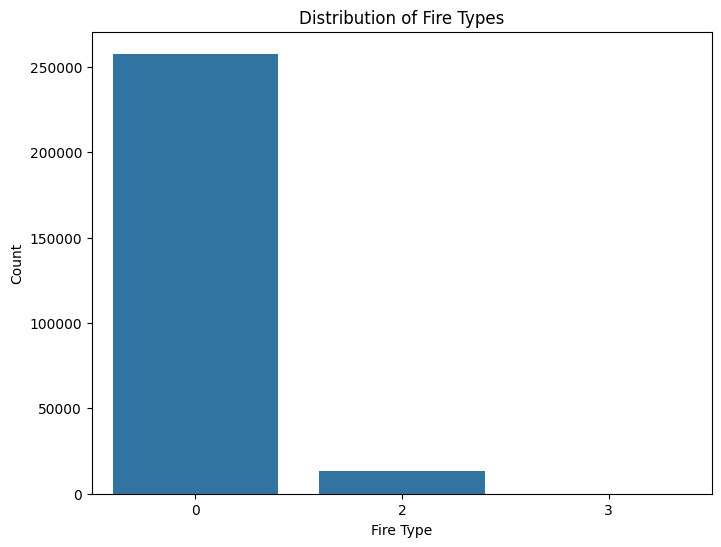

In [28]:
#here we are taking the count plot based on the type means 0,2 and 3

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()


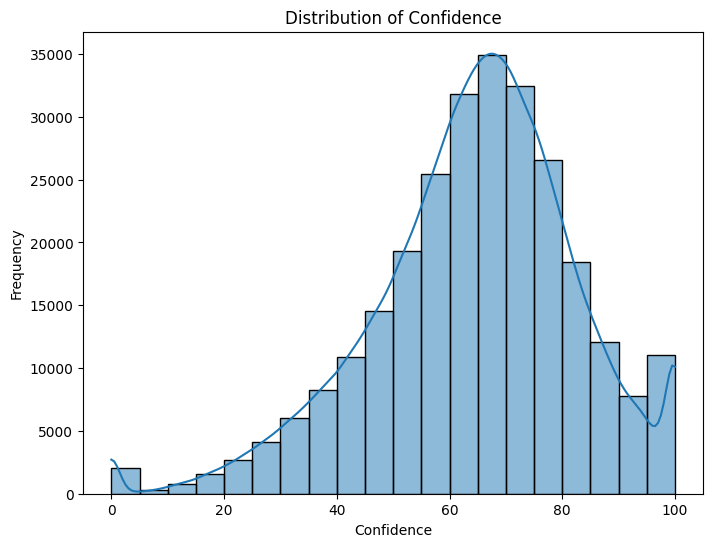

In [31]:
# Histogram of 'confidence':-
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

In [34]:
#categorical Column Encoding:-


le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


# Becoz we know that ml models only understand numerical data or numbers not strings or objects.
# so if some columns like version , satellite ,  etc are in string type , then it is good practice to convert them into numbers.

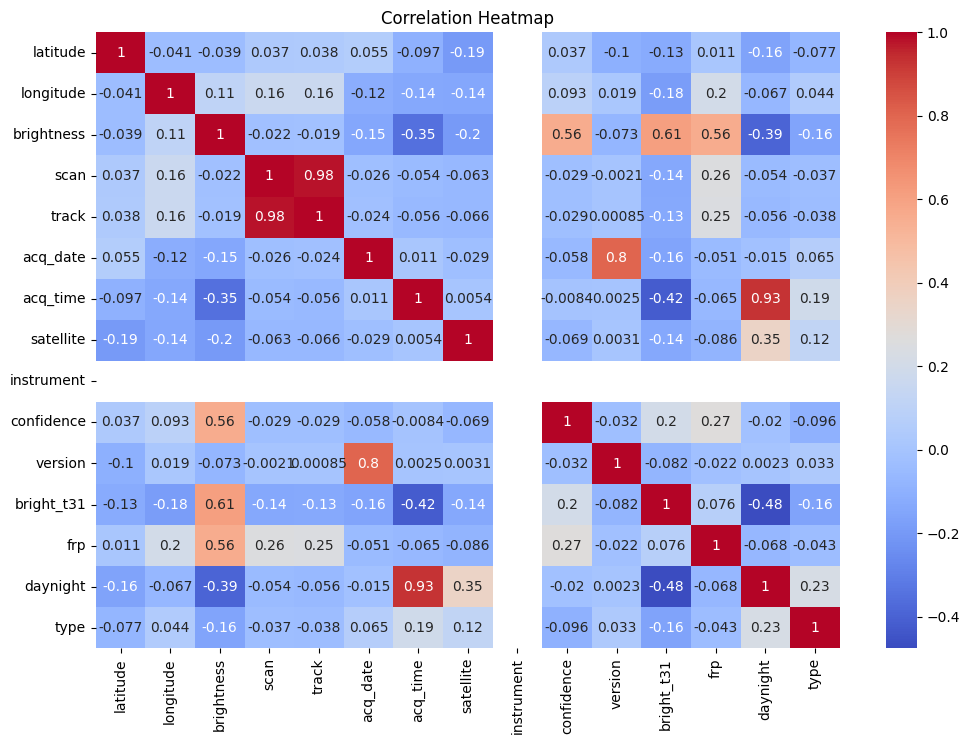

In [35]:
#Correlation Heatmap:-

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# this will help us in feature selection part as correlation matrix gives us idea that how one feature is strongly related to other one

In [38]:
# Feature Selection using SelectKBest:-


X= df.drop('type', axis=1)
y= df['type']


# we are also removing some constant columns as it doen't give any new thing to the model

constant_cols = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(columns=constant_cols)



selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)



# we are using this method becoz in dataset there are many features which are not related or which does not impact our output.
# So this method(SelectKBest) will choose 10 best features from the dataset and  ultimately it will reduce noise and improves accuracy of our model.

In [39]:
# and we can also check the top 10 best features :-


mask= selector.get_support()

selected_features = X.columns[mask]
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['latitude', 'longitude', 'brightness', 'acq_date', 'acq_time',
       'satellite', 'confidence', 'bright_t31', 'frp', 'daynight'],
      dtype='object')


In [44]:
# Train- test split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
